# Information Retrieval 1/2

Dans cette session, nous allons explorer plusieurs méthodes d'Information Retrieval (IR). L'objectif est de comprendre les intérêts et limites de différentes méthodes.

Ces méthodes permettent de sélectionner les passages de texte les plus pertinents à envoyer au modèle génératif. C'est donc une étape essentielle du développement d'un système de RAG, pour permettre de générer une réponse appropriée.

Il faudra ensuite séléctionner les meilleures méthodes à intégrer à l'outil de RAG.

## Load text chunks

In [ ]:
# Passages textuels test

text_chunks = ["""New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.""",
                """Graziano is perhaps the best place in NYC to eat quality fresh pasta, or enjoy a Neapolitan-style pizza.""",
                """The Italian wolf is the national animal of Italy,[159] while the national tree is the strawberry tree.[160] The reasons for this are that the Italian wolf, which inhabits the Apennine Mountains and the Western Alps, features prominently in Latin and Italian cultures, such as the legend of the founding of Rome,[161] while the green leaves, white flowers and red berries of the strawberry tree, native to the Mediterranean, recall the colours of the flag.[160]""",
                """Italian cuisine has a great variety of different ingredients which are commonly used, ranging from fruits and vegetables to grains to cheeses, meats, and fish. In northern Italy, fish (such as cod, or baccalà), potatoes, rice, corn (maize), sausages, pork, and different types of cheese are the most common ingredients.""",
                """A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.""",
               """New York City : A brand new italian restaurant, Italian #1, just opened in little Italy."""
                ]

query = "Do you know any italian restaurant in New York?"

## Utilisation d'embeddings

Une méthode d'IR classique consiste à calculer une représentation vectorielle (embedding) de chaque passage et de la question requête.

Les passages sont donc classés en fonction d'un score de similarité entre leur représentation et celle de la requête.

In [ ]:
# Liste des passages

res_scores = [{'text':text_chunks[i]} for i in range(len(text_chunks))]

res_scores

[{'text': 'New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.'},
 {'text': 'Graziano is perhaps the best place in NYC to eat quality fresh pasta, or enjoy a Neapolitan-style pizza.'},
 {'text': 'The Italian wolf is the national animal of Italy,[159] while the national tree is the strawberry tree.[160] The reasons for this are that the Italian wolf, which inhabits the Apennine Mountains and the Western Alps, features prominently in Latin and Italian cultures, such as the legend of the founding of Rome,[161] while the green leaves, white flowers and red berries of the strawberry tree, native to the Mediterranean, recall the colours of the flag.[160]'},
 {'text': 'Italian cuisine has a great variety of different ingredients which are commonly used, ranging from fruits and vegetables to grains to cheeses, meats, and fish. In no

## Bag Of Words embeddings

### Questions




*   Quel est le principe d'un modèle Bag Of Words (BOW)?

Réponse :étapes: Tokenisation : La première étape consiste à découper le texte en unités discrètes appelées "tokens", généralement des mots. Pendant cette étape, on retire souvent les symboles de ponctuation tels que les virgules, les points, etc.

Liste de stop words : On crée une liste de mots courants, souvent appelés "stop words" ou mots vides (comme "le", "la", "de", "à", "un", "une", etc.), qui sont peu informatifs et n'apportent pas de valeur à la représentation du texte. Ces mots sont ensuite retirés des tokens.

Lemmatisation : Cette étape consiste à ramener chaque mot à sa forme canonique ou de base, en tenant compte de sa morphologie. Par exemple, "restaurants" et "restaurant" deviendraient tous deux "restaurant". Cela permet de réduire la diversité des tokens et de mieux représenter le sens du texte.

Modèle Bag of Words (BoW) : Une fois que le texte a été tokenisé, nettoyé des mots vides et lemmatisé, on peut représenter chaque document sous la forme d'un vecteur où chaque dimension correspond à un mot unique du vocabulaire et la valeur de chaque dimension représente la fréquence du mot dans le document. Ce modèle BoW permet de représenter le texte de manière quantitative, mais sans tenir compte de l'ordre des mots.

### Text preprocessing

In [27]:
# Fonction pour appliquer un traitement sur le texte
# Facultatif
stop_list = [
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at",
    "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can't", "cannot", "could",
    "couldn't", "did", "didn't", "do", "does", "doesn't", "doing", "don't", "down", "during", "each", "few", "for",
    "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's",
    "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm",
    "i've", "if", "in", "into", "is", "isn't", "it", "it's", "its", "itself", "let's", "me", "more", "most",
    "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our",
    "ours", "ourselves", "out", "over", "own", "same", "shan't", "she", "she'd", "she'll", "she's", "should",
    "shouldn't", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves",
    "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through",
    "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were",
    "weren't", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why",
    "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll", "you're", "you've", "your", "yours",
    "yourself", "yourselves"
]

def preprocess_text(input_text):
  output_text = input_text.lower()
  output_text_mots_non_vides = [x for x in output_text if x not in stop_list]
  return output_text

### TF

Une première méthode consiste à calculer la fréquence de chaque mot dans les passages. On s'appuie aussi sur un vocabulaire, qui peut classiquement être composé de tous les mots des passages.

Un passage est alors représenté par un vecteur de la taille du vocabulaire, où la ième valeur compte le nombre d'occurence du ième mot du vocabulaire dans le passage.

On peut par exemple utiliser l'objet CountVectorizer de la bibliothèque scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Cet objet peut déjà inclure un certain nombre de prétraitements, examinez la documentation pour déterminer l'utilisation optimale.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Charge un modèle de TF
counter = CountVectorizer()

# Fit le modèle et calcule les embeddings des passages
text_embeddings = counter.fit_transform(text_chunks)

# Calcule l'embedding de la query avec le même modèle
query_embedding = counter.transform([query])

In [29]:
# Calcul des scores

tf_scores = text_embeddings.dot(query_embedding.toarray().flatten())
for i in range(len(tf_scores)):
  res_scores[i]['tf_score'] = tf_scores[i]

In [30]:
# Classe les passages selon le score TF

sorted(res_scores,key=lambda x: x['tf_score'],reverse=True)[:10]

[{'text': 'A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.',
  'tf_score': 11},
 {'text': 'New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.',
  'tf_score': 8},
 {'text': 'New York City : A brand new italian restaurant, Italian #1, just opened in little Italy.',
  'tf_score': 7},
 {'text': 'The Italian wolf is the national animal of Italy,[159] while the national tree is the strawberry tree.[160] The reasons for this are that the Italian wolf, which inhabits the A

### TFIDF

In [31]:
# TODO : Calculer les embeddings avec la méthode TF-IDF*
from sklearn.feature_extraction.text import TfidfVectorizer



# Initialisation du TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit le modèle et calcule les embeddings TF-IDF des passages
text_tfidf = tfidf_vectorizer.fit_transform(text_chunks)

# Calcule l'embedding TF-IDF de la requête avec le même modèle
query_tfidf = tfidf_vectorizer.transform([query])

# Calcul des scores TF-IDF
tfidf_scores = text_tfidf.dot(query_tfidf.T).toarray().flatten()

# Affichage des résultats

for i in range(len(tfidf_scores)):
  res_scores[i]['tfidf_score'] = tfidf_scores[i]
sorted(res_scores,key=lambda x: x['tfidf_score'],reverse=True)[:10]

[{'text': 'New York City : A brand new italian restaurant, Italian #1, just opened in little Italy.',
  'tf_score': 7,
  'tfidf_score': 0.6596132444296052},
 {'text': 'New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.',
  'tf_score': 8,
  'tfidf_score': 0.3391215040769731},
 {'text': 'A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.',
  'tf_score': 11,
  'tfidf_score': 0.31190627679577376},
 {'text': 'The Italian wolf is the national animal of Italy,[159] while the

In [32]:
# TODO : Calcule les scores TF-IDF

In [33]:
# TODO : Trier les phrases selon les scores TF-IDF et les afficher

## Questions



*   Quel est l'intérêt du modèle TF-IDF par rapport au calcul TF?
*   Quelles sont les limites fondamentales d'un modèle BOW
*   (Facultatif) Qu'est ce que la méthode BM25 et quel ajout propose-t-elle par rapport à une TF-IDF?





Réponses : TODO

## Dense Embedding

Des modèles plus complexes permettent de créer des embeddings plus efficaces. Beaucoup de modèles existent, et différents leaderboards permettent de les comparer. Par exemple, le leaderboard MTEB de HuggingFace liste de nombreux modèles (https://huggingface.co/spaces/mteb/leaderboard).
L'utilisation est ensuite similaire aux modèles BOW étudiés dans la partie précédente.

### Embedding from HuggingFace

## Questions

*   En observant le leaderboard d'huggingface pour les modèles d'embedding (https://huggingface.co/spaces/mteb/leaderboard), quelles sont les modèles qui semblent les plus pertinents?


*   Nous proposons par exemple d'utiliser le modèle *mxbai-embed-large-v1*. Quels sont les avantages de ce modèle?

Réponses : TODO

In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
from tqdm import tqdm


from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim
from tqdm import tqdm

# Charger un modèle public de sentence-transformers
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Exemple de passages à embedder
passages = ["New York is known to be the largest Italian-American population in North America and third largest Italian population outside of Italy, according to the 2000 census. See also Italians in New York City for more info.",
                "Graziano is perhaps the best place in NYC to eat quality fresh pasta, or enjoy a Neapolitan-style pizza.",
                "The Italian wolf is the national animal of Italy,[159] while the national tree is the strawberry tree.[160] The reasons for this are that the Italian wolf, which inhabits the Apennine Mountains and the Western Alps, features prominently in Latin and Italian cultures, such as the legend of the founding of Rome,[161] while the green leaves, white flowers and red berries of the strawberry tree, native to the Mediterranean, recall the colours of the flag.[160]",
                "Italian cuisine has a great variety of different ingredients which are commonly used, ranging from fruits and vegetables to grains to cheeses, meats, and fish. In northern Italy, fish (such as cod, or baccalà), potatoes, rice, corn (maize), sausages, pork, and different types of cheese are the most common ingredients.",
                "A strange italian restaurant. After a long day at work in his New York City office, he wanted to enjoy delicious italian food at the newly opened La Casa di Pasta. But it was actually a nursery, specializing in Italian-themed plants and decorations, with no food in sight. No italian food today, left feeling hungry and deceived, wishing the beautiful garden center had actually been the restaurant of his dreams.",
               "New York City : A brand new italian restaurant, Italian #1, just opened in little Italy."
                ]

# Calculer les embeddings des passages
embeddings = [model.encode(passage, convert_to_tensor=True) for passage in tqdm(passages)]

# Afficher les embeddings
for i, embedding in enumerate(embeddings):
    print(f"Embedding pour le passage {i+1} : {embedding}")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
100%|██████████| 6/6 [00:00<00:00, 20.39it/s]

Embedding pour le passage 1 : tensor([ 7.8554e-02, -9.1845e-02, -2.5044e-02,  3.3898e-03, -6.9699e-02,
        -1.1911e-02,  1.2288e-02, -6.2494e-02, -7.4334e-02, -6.3576e-02,
         1.5626e-02, -1.9014e-02, -8.5360e-02,  8.1160e-02, -4.9646e-02,
         3.3193e-02,  6.7982e-02,  1.5246e-02,  2.6009e-02,  3.6935e-02,
         3.5115e-02, -8.4400e-02,  7.6163e-02,  9.8520e-02,  7.1409e-02,
         7.1882e-03,  2.4913e-02,  2.7636e-02, -4.4235e-02,  5.5478e-03,
        -6.0270e-02,  6.4816e-02,  7.6343e-02, -1.6064e-03,  3.3594e-02,
        -1.9167e-02, -5.6869e-03,  1.6428e-02,  1.1081e-01,  3.0927e-02,
        -1.0832e-02,  5.5393e-02,  7.4170e-02,  4.7307e-02,  5.2135e-02,
         4.7801e-02, -4.3625e-02,  1.1081e-01,  1.4268e-02,  5.4280e-03,
        -4.3228e-02,  3.6737e-02,  2.8978e-02,  5.1619e-02,  1.1578e-03,
         6.8749e-04,  9.5054e-02, -7.2324e-02, -7.3231e-02,  2.8735e-02,
        -2.9615e-02, -1.7821e-02,  4.4981e-02,  3.8142e-02, -3.8848e-02,
         6.5745e-02, 

In [ ]:
# TODO : Calculer l'embedding de la requête
requête = "beautiful today"

embedding_requete = model.encode(requête, convert_to_tensor = True)

# TODO : Calculer les scores

similarity = [cos_sim(embedding_requete, embedding) for embedding in embeddings]

# TODO : Calculer les scores
print(similarity)

[tensor([[-0.0481]]), tensor([[0.1029]]), tensor([[0.0831]]), tensor([[-0.0890]]), tensor([[0.2301]]), tensor([[0.1139]])]


In [ ]:
# Liste originale
my_list = similarity

# Trier les indices selon les valeurs dans my_list en ordre décroissant
sorted_indices = sorted(range(len(my_list)), key=lambda k: my_list[k], reverse=True)

print(sorted_indices)


[4, 5, 2, 3, 1, 0]


## Modèle spécalisé

Au lieu de calculer un score de similarité sur des embeddings, on peut utiliser un modèle qui prend directement en entrée un passage et la requête et qui calcule un score. Il existe en effet des réseaux de neuronnes spécialisés dans cette tâche.

Vous pouvez par exemple utiliser le modèle 'BAAI/bge-reranker-large' : https://huggingface.co/BAAI/bge-reranker-large

In [ ]:
!pip install FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
  Created wheel for FlagEmbedding: filename=FlagEmbedding-1.2.10-py3-none-any.whl size=166100 sha256=ca6f18fd1fb323c394c0167e72caa2000768e874a5089fe59dbcf9cbad44a27c
  Stored in directory: /root/.cache/pip/wheels/3b/1d/d2/eec38cd59144f4c9767d7c55cfae8e8feec699071aa41ca5da
Successfully built FlagEmbedding
  Attempting uninstall: requests
    Found existing installation: requests 2.

In [ ]:
from FlagEmbedding import FlagModel
# TODO : charge le modèle
#model_name = "BAAI/bge-reranker-large"
model = FlagModel('BAAI/bge-large-zh-v1.5',
                  use_fp16=True)
# TODO : Calculer les scores et les ajouter au dictionnaire des scores
# Supposons que passages est une liste de chaînes de caractères contenant vos passages

# Calculer les scores pour chaque passage
passages = [
    "Le chat est sur le canapé.",
    "Il fait beau aujourd'hui.",
    "L'intelligence artificielle transforme le monde."
]
scores = {}

for passage in passages:
    # Récupérer les scores
    embedding1 = model.encode("aujourd'hui")
    embedding2 = model.encode(passage)
    score = embedding1 @ embedding2
    # Ajouter le score au dictionnaire des scores
    scores[passage] = score

# Afficher les scores
print(scores)
# TODO : Calculer les scores et les ajouter au dictionnaire des scores


In [ ]:
# Trie les phrases selon le score calculé et affiche les meilleurs passages.
passages_tries = sorted(scores.items(), key=lambda x: x[1], reverse=True)
print(passages_tries)

## Analyse des résultas

### Représenter sous la forme de bar plot les scores des extraits pour les deux méthodes (dense embedding + cosine similarity et modèle reranker)

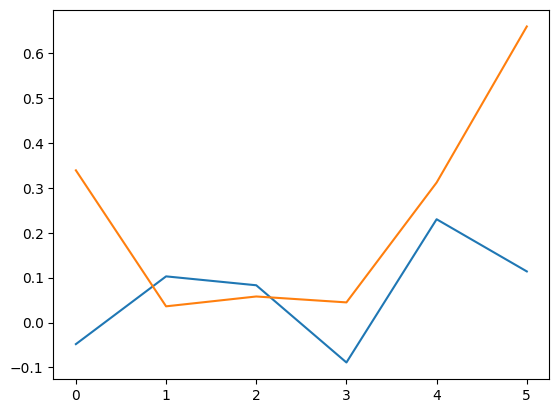

In [35]:
import matplotlib.pyplot as plt
import torch

absc = [i for i in range(len(passages))]
plt.clf()
values = [t.item() for t in similarity]
plt.plot(absc, values)
plt.plot(absc, [res_scores[i]['tfidf_score'] for i in range(len(passages))])
plt.show()

# TODO





*   Quelle est la différence fondamentale dans l'utilisation, en pratique, des deux méthodes précédentes?
*   En examinant les deux modèles précédents, lequel devrait être en principe donner les meilleurs résultats et pourquoi?
*   Finalement, quels sont les intérêts d'avoir à disposition ces deux modèles et en quoi peuvent-ils être complémentaires?
*   Expliquez pourquoi le dernier modèle est appelé "reranker".


Réponses : TODO

## Bonus

### BM25



*   BM25 est-elle une méthode sparse/BOW ou bien dense?
*   Quels sont les avantages de BM25 par rapport à d'autres méthodes du même type?
*   Implémenter l'algorithme BM25.




In [ ]:
def BM25(text_chunks,query):
  return

### word2vec


*   word2vec est-elle une méthode sparse/BOW ou bien dense?
*   Quels sont les avantages de word2vec par rapport à d'autres méthodes du même type?
*   Tester l'algorithme word2vec.

### BERT Encoder


*   Utiliser un encodeur BERT correspond à une méthode sparse/BOW ou bien dense?
*   Quels sont les avantages de BERT par rapport à d'autres méthodes du même type?
*   Tester le modèle BERT.